In [108]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torchvision.transforms.functional as fn
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt

tensor([[[0.2980, 0.3098, 0.3176,  ..., 0.0392, 0.0471, 0.0549],
         [0.2980, 0.3059, 0.3020,  ..., 0.0471, 0.0510, 0.0549],
         [0.2980, 0.3137, 0.2784,  ..., 0.0863, 0.1020, 0.0941],
         ...,
         [0.4157, 0.4078, 0.3961,  ..., 0.4902, 0.5333, 0.6392],
         [0.4706, 0.4706, 0.4157,  ..., 0.5137, 0.6078, 0.5765],
         [0.4667, 0.4745, 0.4784,  ..., 0.5686, 0.5451, 0.6549]],

        [[0.2078, 0.2196, 0.2353,  ..., 0.0471, 0.0510, 0.0510],
         [0.2235, 0.2431, 0.2392,  ..., 0.0549, 0.0549, 0.0510],
         [0.2706, 0.2784, 0.2471,  ..., 0.0941, 0.1020, 0.0902],
         ...,
         [0.3882, 0.3843, 0.3725,  ..., 0.4667, 0.4980, 0.6039],
         [0.4431, 0.4471, 0.3922,  ..., 0.4902, 0.5843, 0.5529],
         [0.4392, 0.4471, 0.4549,  ..., 0.5490, 0.5255, 0.6314]],

        [[0.2392, 0.2510, 0.2549,  ..., 0.0275, 0.0314, 0.0353],
         [0.2314, 0.2431, 0.2392,  ..., 0.0353, 0.0353, 0.0353],
         [0.2314, 0.2431, 0.2039,  ..., 0.0824, 0.0941, 0.

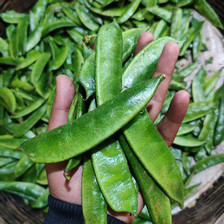

In [109]:
img = Image.open("data/Vegetable Images/test/Bean/0001.jpg")
img_tensor = fn.to_tensor(img)
print(img_tensor)
print(f"Mean: {img_tensor.mean()}\nStd: {img_tensor.std()}")
img

In [110]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
                [0.5, 0.5, 0.5], 
                [0.5, 0.5, 0.5]
        )
])

In [111]:
train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        # [0.485, 0.456, 0.406],
        # [0.229, 0.224, 0.225],
        [0.5, 0.5, 0.5], 
        [0.5, 0.5, 0.5]
    )
])

In [112]:
train_set = ImageFolder('data/Vegetable Images/train', transform=train_transform)
val_set = ImageFolder('data/Vegetable Images/validation', transform=train_transform)
test_set = ImageFolder('data/Vegetable Images/test', transform=train_transform)

In [113]:
print(len(train_set.samples), len(val_set.samples), len(test_set.samples))

15000 3000 3000


In [114]:
print(train_set.classes)
print(len(train_set.classes))

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
15


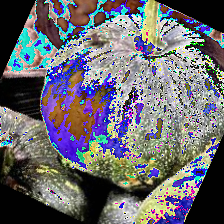

In [127]:
dataloader = DataLoader(train_set, batch_size=32, shuffle=True)
images, labels = next(iter(dataloader))
fn.to_pil_image(images[0])

In [116]:
print(labels)

tensor([ 7,  9,  3, 11, 12, 13,  4,  7, 13, 11, 11, 10, 10,  0, 12,  9,  0,  8,
         6,  8,  4,  5,  7,  8,  9, 12,  2,  7,  8,  8, 14,  6])
